In [1]:
# Importando as bibliotecas necessárias
# Metricas usadas para comparacoes
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Importando o modelo que sera utilizado
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Plot dos gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamento de dados
import pandas as pd

# Recebendo os dados:
from googledrivedownloader import download_file_from_google_drive as gdd

# Preparando os dados

Iremos aproveitar os dados de diabetes que preparamos anteriormente na aula 2.3 Normalização e Padronização dos Dados.ipynb. Assim, aproveitaremos a Tarefa#1 e a Tarefa #2 dessa aula para receber os dados e fazer uma breve análise exploratória dos mesmos.

## Tarefa #1: Recebendo os dados

In [2]:
# Recebendo os dados:
data_google_id = '1Jjf3OnYm12rgABJe9dsMs5m_Xz5HNaSl'
gdd(file_id=data_google_id,
    dest_path = './dados.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
    showsize = True)

# Armazenandos os dados em um DataFrame
# para receber os dados o sep teve como argumento o valor ','. Isso ocorreu devido a
diabetes = pd.read_csv("dados.csv", sep = ',')

## Tarefa #2: Analise Exploratória dos Dados

Vamos ver informações gerais dos nossos dados:

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [4]:
diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [5]:
diabetes.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Podemos observar uma diferença significativa na escala dos dados quando comparamos a coluna `pedi` com a coluna `insu`. Um modelo de Aprendizado de Máquina **pode** se tornar tendencioso se essa diferença de escala continuar nos dados. Por isso, iremos ver os conceitos da **Normalização e Padronização dos Dados**

Antes disso, vamos explorar um pouco os dados fazendo um histrograma de todas as colunas numéricas e a contagem dos valores da coluna `class` do nosso conjunto de dados:

<Axes: xlabel='mass', ylabel='Count'>

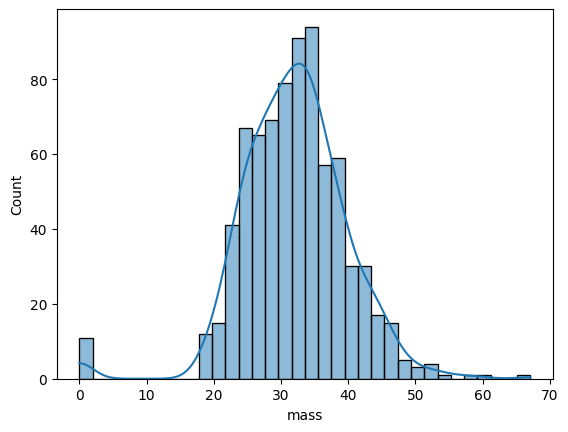

In [6]:
sns.histplot(x=diabetes["mass"], kde= True)

Fizemos isso para uma única coluna `mass`. Entretanto, preciso fazer isso para todas as colunas do meu DataFrame. Para isso podemos usar o método `hist()` do nosso DataFrame:

array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'plas'}>,
        <Axes: title={'center': 'pres'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'insu'}>,
        <Axes: title={'center': 'mass'}>],
       [<Axes: title={'center': 'pedi'}>,
        <Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

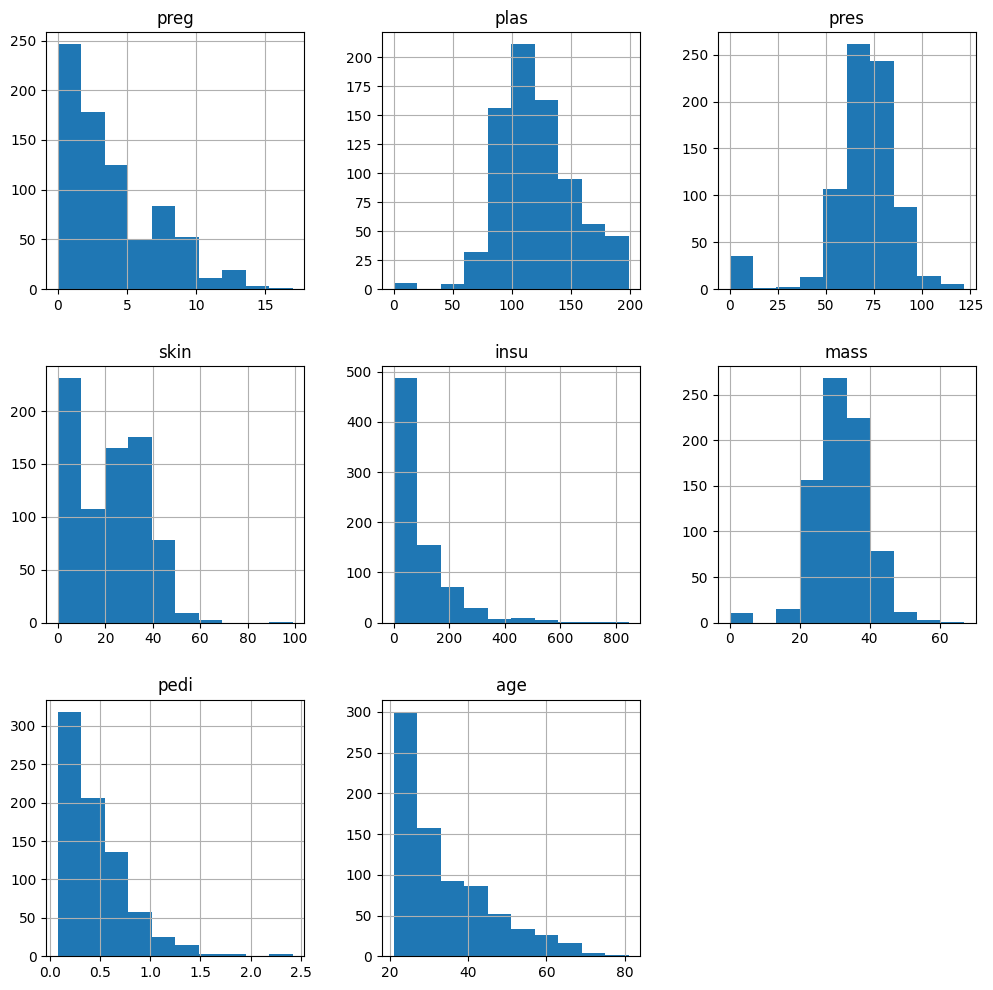

In [7]:
diabetes.hist(figsize=(12,12))

Também é importante analisarmos a proporção dos dados na coluna de saída. Se a frequência de uma das classes for, por exemplo, 10 vezes maior do que a da outra, é recomendável ajustar a distribuição das linhas da tabela para torná-la mais equilibrada. Embora não façamos esse ajuste neste momento, é fundamental ter em mente que ele pode ser necessário.

<Axes: xlabel='class', ylabel='count'>

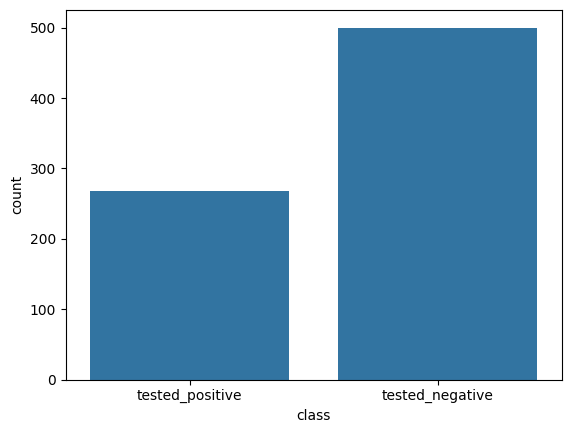

In [8]:
sns.countplot(data=diabetes, x = 'class')

Ao analisarmos o gráfico acima, podemos perceber que nossa tabela não está desbalanceada. Ou seja, a proporção de registros com tested_positive não é 10 vezes maior do que a de tested_negative, e vice-versa

# Aplicando IA aos nossos dados

Após a análise exploratória dos nossos dados podemos iniciar a aplicação de um algoritmo de machine learning para aprendermos as relações das entradas com a saída do problema que estamos estudando.

In [9]:
diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


Vamos começar separando as entradas/recursos `X` da saída/rótulo `y`, dividindo os dados em conjunto de treinamento e teste e ajustar as escalas dos nossos dados:

In [10]:
# Separando os dados de entrada e de saída
X = diabetes.drop(columns=["class"]) #Recursos
Y = diabetes["class"] #Rótulos/Labels

# Dividindo os dados no conjunto de teste e treinamento
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Aplicando a normalização
# levantando os minimos e maximos
scaler = MinMaxScaler().fit(X_train)
# Mudando a escala dos dados
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Criando o modelo de regressão logistica

A seguir vamos criar o modelo de Regressão Logística, treiná-lo e obter as previsões da saída do nosso modelo:

In [11]:
# Fazendo a regressao logistica
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train) # Treinamento

# Fazendo as predições
y_pred_rl = log_reg.predict(X_test_scaled)

In [12]:
# Checando 20 primeiras saidas das previsoes
y_pred_rl[:20]

array(['tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_positive', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative'], dtype=object)

Podemos comparar as previsões do modelo (`y_pred`) com os valores verdadeiros, isto é, os valores que o modelo deveria estar prevendo (`y_test`)

In [13]:
# Checando as 20 primeiras saidas dos labels
y_test[:20]

,class
668,tested_negative
324,tested_negative
624,tested_negative
690,tested_negative
473,tested_negative
204,tested_negative
97,tested_negative
336,tested_negative
568,tested_negative
148,tested_negative


Vamos criar uma tabela para isso:

In [14]:
# Comparando usando o DataFrame
dados = pd.DataFrame({'pred_rl': y_pred_rl, 'Valor_Verdadeiro': y_test})
mask = dados['pred_rl'] == dados['Valor_Verdadeiro']
mask.sum()

np.int64(172)

Temos um total de 172 valores iguais nas duas colunas, isto é, 172 acertos que o modelo teve. Nesse cenário podemos calcular a acurácia, que vai obter a propoção de acertos calculando o total de acertos dividido pelo número de linhas da tabela do conjunto de teste:

In [15]:
X_test.shape

(231, 8)

In [16]:
172/231

0.7445887445887446

Ou podemos fazer isso usando a função `accuracy_score`

In [17]:
# Acuracia para o nosso modelo
accuracy_score(y_test, y_pred_rl)

0.7445887445887446

## Criando o modelo k-NN

Vamos repetir o que fizemos anteriormente para a Regressão Logistica, só que agora vamos fazer isso para o k-NN:

In [18]:
# Fazendo o k-NN
# n_neighbors é o valor da quantidade de vizinhos que será considerada
knn_clf = KNeighborsClassifier(n_neighbors=15)
knn_clf.fit(X_train_scaled, y_train)

# Fazendo as predições
y_pred_knn = knn_clf.predict(X_test_scaled)

In [19]:
# Comparando usando o DataFrame
pd.DataFrame({'pred-kNN': y_pred_knn, 'resp': y_test})

,pred-kNN,resp
668,tested_negative,tested_negative
324,tested_negative,tested_negative
624,tested_negative,tested_negative
690,tested_positive,tested_negative
473,tested_positive,tested_negative
...,...,...
619,tested_negative,tested_positive
198,tested_negative,tested_positive
538,tested_negative,tested_negative
329,tested_negative,tested_negative


In [20]:
# Acuracia para o nosso modelo
accuracy_score(y_test, y_pred_knn)

0.7229437229437229

Os dois modelos obtiveram desempenhos próximos de acurácia. Se fossemos escolher apenas analisando essa métrica escolheriamos a Regressão Logística por possuir a melhor métrica de desempenho.

Nosso próximo assunto será abordar outras métricas de desempenho que podem ser levadas em consideração na escolha do melhor modelo.

## Métricas de Desempenho

### Analisando o modelo da **regressão logistica**:

Antes de usarmos uma função que irá nos dar a matriz de confusão vamos tentar obter os valores da matriz usando o Pandas. Para isso, vamos considerar a classe positiva como o `tested_positive`

Vamos aproveitar a tabela dados que tinhamos duas colunas:

- pred_rl: Previsões da Regressão Logistica;
- Valor_Verdadeiro: valores que o modelo deveria estar prevendo (y_test)

In [21]:
dados.head()

,pred_rl,Valor_Verdadeiro
668,tested_negative,tested_negative
324,tested_negative,tested_negative
624,tested_negative,tested_negative
690,tested_negative,tested_negative
473,tested_negative,tested_negative


Na sequência vamos criar mascaras para ver os valores do TP, FP, TN e FN:

In [22]:
TP = (dados['pred_rl']==dados['Valor_Verdadeiro']) & (dados['pred_rl']=='tested_positive')
TP = TP.sum()
TP

np.int64(45)

In [23]:
FP = (dados['pred_rl']!=dados['Valor_Verdadeiro']) & (dados['pred_rl']=='tested_positive')
FP = FP.sum()
FP

np.int64(24)

In [24]:
TN = (dados['pred_rl']==dados['Valor_Verdadeiro']) & (dados['pred_rl']=='tested_negative')
TN = TN.sum()
TN

np.int64(127)

In [25]:
FN = (dados['pred_rl']!=dados['Valor_Verdadeiro']) & (dados['pred_rl']=='tested_negative')
FN = FN.sum()
FN

np.int64(35)

Assim a matriz será:

In [26]:
matriz_confusao = pd.DataFrame({'Testou +': [TP, FP],
                                'Testou -' : [FN, TN]})
matriz_confusao.index = ['Testou +', 'Testou -']
matriz_confusao

,Testou +,Testou -
Testou +,45,35
Testou -,24,127


Vamos agora fazer a matriz de confusão para analisar o nosso resultado. Para isso, vamos usar a função `confusion_matrix`. Ela precisa dos seguintes argumentos:

* Dados de saída/rótulo do conjunto de teste (`y_test`);
* Dados de saída/rótulo previstos pelo modelo (`y_pred`);
* Rótulos usados na coluna de saída do modelo (no nosso exemplo: `['tested_positive','tested_negative']`)

In [27]:
cm = confusion_matrix(y_test, y_pred_rl, labels = ['tested_positive','tested_negative'])
cm

array([[ 45,  35],
       [ 24, 127]])

Para apresentramos a nossa matriz de confusão em forma de uma figura podemos usar a função `ConfusionMatrixDisplay`. Essa função precisa dos seguintes argumentos:
* `confusion_matrix`: A matriz de confusão obtida pela função `confusion_matrix`
* `display_labels`: Os rótulos que você deseja que apareçam na imagem

<Figure size 1500x500 with 0 Axes>

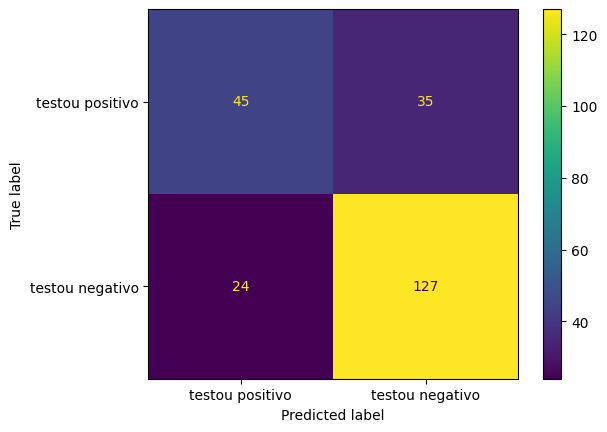

In [28]:
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['testou positivo','testou negativo'])
disp.plot(values_format='d')

Começando com a precisão:

$precisao = \frac{TP}{TP+FP}$

In [29]:
# Calculando a precisão para o "tested positive"
precision_score(y_test, y_pred_rl, pos_label='tested_positive')

0.6521739130434783

In [30]:
# Precisao para o nosso modelo considerando a classe "tested_positive"
precisao = 45/(45+24)
precisao

0.6521739130434783

In [31]:
# Calculando a precisão para o "tested negative"
precision_score(y_test, y_pred_rl, pos_label='tested_negative')

0.7839506172839507

In [32]:
# Precisao para o nosso modelo considerando a classe "tested_negative"
precisao = 127/(127+35)
precisao

0.7839506172839507

Calculando a revocação:

$revocacao = \frac{TP}{TP+FN}$

In [33]:
recall_score(y_test, y_pred_rl, pos_label='tested_positive')

0.5625

In [34]:
# Revocação para o nosso modelo considerando a classe "tested_positive"
revocacao = 45/(45+35)
revocacao

0.5625

In [35]:
recall_score(y_test, y_pred_rl, pos_label='tested_negative')

0.8410596026490066

In [36]:
# Revocação para o nosso modelo considerando a classe "tested_positive"
revocacao = 127/(127+24)
revocacao

0.8410596026490066

Calculando o f1 score:

$F_{1} = 2\times\frac{precisao \times revocacao}{precisao + revocacao}$

In [37]:
f1_score(y_test, y_pred_rl, pos_label='tested_positive')

0.6040268456375839

In [38]:
f1_score(y_test, y_pred_rl, pos_label='tested_negative')

0.8115015974440895

Calculando a acurácia:

$acuracia = \frac{TP+TN}{TP+TN+FP+FN}$

In [39]:
# Acuracia para o nosso modelo
accuracy_score(y_test, y_pred_rl)

0.7445887445887446

In [40]:
# Comparando com o que vimos em aula
acuracia = (127+45)/(127+24+35+45)
acuracia

0.7445887445887446

- Podemos usar uma função que nos retorna todas as métricas de uma só vez: `classification_report`. Fizemos manualmente as células anteriores com o objetivo de compreender todos os conceitos necessários para obtenção das métricas

In [41]:
print(classification_report(y_test, y_pred_rl))

                 precision    recall  f1-score   support

tested_negative       0.78      0.84      0.81       151
tested_positive       0.65      0.56      0.60        80

       accuracy                           0.74       231
      macro avg       0.72      0.70      0.71       231
   weighted avg       0.74      0.74      0.74       231



### Analisando o modelo de **k-NN**:

Vamos agora analisar o modelo do k-NN, mas como já aprendemos os conceitos das métricas vamos fazer isso de uma forma mais direta:

In [42]:
cm_knn = confusion_matrix(y_test, y_pred_knn, labels = ['tested_positive','tested_negative'])
cm_knn

array([[ 41,  39],
       [ 25, 126]])

<Figure size 1500x500 with 0 Axes>

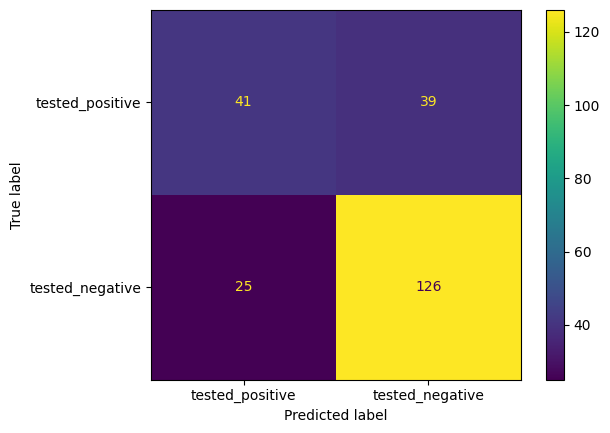

In [43]:
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = cm_knn, display_labels=['tested_positive','tested_negative'])
disp.plot(values_format='d')

In [44]:
print(classification_report(y_test, y_pred_knn))

                 precision    recall  f1-score   support

tested_negative       0.76      0.83      0.80       151
tested_positive       0.62      0.51      0.56        80

       accuracy                           0.72       231
      macro avg       0.69      0.67      0.68       231
   weighted avg       0.71      0.72      0.72       231



## Comparando os modelos com a curva ROC

Vamos fazer a curva ROC e comparar ambos os modelos. Lembrando que isso só e realizado em modelos probabilisticos e recomendado em casos onde a coluna de saída possui apenas dois valores possíves.

In [45]:
# Primeiro vamos levar o valor das probabilidades, isto é, os valores sem aplicarmos a classificacao.
y_score_reglog = log_reg.predict_proba(X_test_scaled)

Vamos analisar o resultado do `predict_proba`:

In [46]:
#Criando a tabela para analisarmos o resultado
dicionario = {'% teste -' : y_score_reglog[:,0],
              '% teste +' : y_score_reglog[:,1],
              'y_pred' : y_pred_rl}
dados = pd.DataFrame(dicionario)
# Filtrando apenas as colunas com tested_positive:
dados[dados['y_pred']=='tested_positive'].head()

,% teste -,% teste +,y_pred
8,0.487999,0.512001,tested_positive
9,0.329304,0.670696,tested_positive
11,0.195389,0.804611,tested_positive
18,0.365824,0.634176,tested_positive
24,0.489933,0.510067,tested_positive


Podemos notar que caso a probabilidade de teste positivo (coluna % teste +) seja maior que 50% o modelo classificou os dados como `tested_positive`. Caso foi abaixo de 50% ele classificou como `tested_negative`:

In [47]:
# Filtrando apenas as colunas com tested_positive:
dados[dados['y_pred']=='tested_negative'].head()

,% teste -,% teste +,y_pred
0,0.675859,0.324141,tested_negative
1,0.785043,0.214957,tested_negative
2,0.839032,0.160968,tested_negative
3,0.749768,0.250232,tested_negative
4,0.512850,0.487150,tested_negative


Vamos agora simular um caso de teste da curva ROC. Vamos usar os dados das probabilidades para estimar como seria a classificação dos dados caso o limiar de decisão não fosse 50%, mas sim 60%. Para isso, vamos criar uma nova coluna que os dados serão categorizados seguindo essa regra:

In [48]:
mask_1 = dados['% teste +']>=0.6
mask_2 = dados['% teste +']<0.6
dados.loc[mask_1,'y_pred 60%'] = 'tested_positive'
dados.loc[mask_2,'y_pred 60%'] = 'tested_negative'

Analisando o resultado a seguir para os casos de tested_positive:

In [49]:
dados[dados['y_pred']=='tested_positive'].head()

,% teste -,% teste +,y_pred,y_pred 60%
8,0.487999,0.512001,tested_positive,tested_negative
9,0.329304,0.670696,tested_positive,tested_positive
11,0.195389,0.804611,tested_positive,tested_positive
18,0.365824,0.634176,tested_positive,tested_positive
24,0.489933,0.510067,tested_positive,tested_negative


Podemos ver que a nova coluna possui diferenças das previsões originais da Regressão Logística. Isso ocorre porque o limiar de decisão foi alterado. Para fazermos a curva ROC teriamos que repetir essas alterações do limiar de decisão discretizando o intervalo de 0 até 100% em outros valores. Após isso, teriamos que calcular o TPR e o FPR de cada uma dessas novas colunas. Felizmente não precisamos fazer isso porque já temos uma função que faz isso.

Agora que entendemos o `predict_proba` podemos usar ele para cálcular a AUC da curva ROC e plotar o gráfico da curva ROC para a regressão logistica e para o k-NN:

In [50]:
# Primeiro vamos levar o valor das probabilidades, isto é, os valores sem aplicarmos a classificacao.
y_score_reglog = log_reg.predict_proba(X_test_scaled)[:,1] # pegamos a primeira coluna que é a previsão da classe positiva.
# Calculando o valor da AUC para o nosso modelo
roc_auc = roc_auc_score(y_test,y_score_reglog)
roc_auc

np.float64(0.796274834437086)

In [51]:
# Primeiro vamos levar o valor das probabilidades, isto é, os valores sem aplicarmos a classificacao.
y_score_knn = knn_clf.predict_proba(X_test_scaled)[:,1] # pegamos a primeira coluna que é a previsão da classe positiva.
# Calculando o valor da AUC para o nosso modelo
roc_auc_knn = roc_auc_score(y_test,y_score_knn)
roc_auc_knn

np.float64(0.7732201986754966)

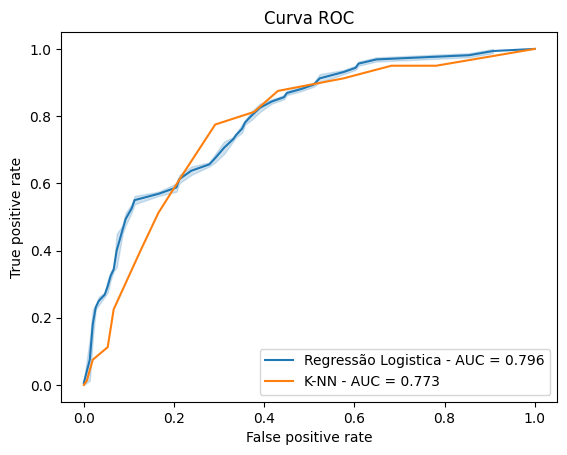

In [52]:
# cuidado com o pos_label, se você colocar da classe negativa a curva ROC vai ficar invertida. Sempre analisar visualmente a imagem e o AUC
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_score_reglog, pos_label='tested_positive')
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_score_knn, pos_label='tested_positive')

# plotando o grafico
sns.lineplot(x=fpr_log, y=tpr_log, label= f"Regressão Logistica - AUC = {roc_auc:.3f}")
sns.lineplot(x=fpr_knn, y=tpr_knn, label= f"K-NN - AUC = {roc_auc_knn:.3f}")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Curva ROC')
plt.legend(loc='best')
